In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30,
    'figure.figsize' : (10,6)})
plt.rcParams.update({'font.size': 20})


In [2]:
kb = 1.380649e-23#J/K
T = 3 #K
bmu = 30
mu = bmu*T*kb

C = 1 # normalisation constant  C = A*sqrt(mu)

def pdf(x):
    return C*np.sqrt(x)/(np.exp(bmu*(x-1))+1)


$$f(\epsilon) = A\,\frac{\sqrt{\epsilon}}{\exp(\beta\,(\epsilon - \mu))+1}$$
$$ x = \frac{\epsilon}{\mu} \hspace{1cm} C = A\cdot\sqrt{\mu} \hspace{1cm} \beta\cdot\mu = 30$$

$$pdf(x) = C\,\frac{\sqrt{x}}{\exp(30(x - 1))+1}$$


# Task 1

## a)

In [3]:
I = quad(pdf,0,20)
print(I)
C = 1/I[0] # Normalisation

pdfxmax = 1.3
pdfymax = max(pdf(np.linspace(0,1.3,1000)))*1.01

(0.667581404941691, 4.166195166632747e-10)


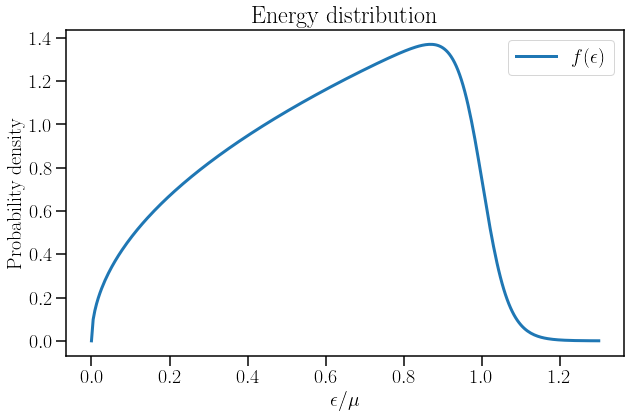

In [4]:
# Distribution
xx = np.linspace(0,pdfxmax,300)
fy = pdf(xx)
plt.plot(xx,fy,label=r'$f(\epsilon)$',lw=3)

plt.title("Energy distribution")
plt.xlabel(r'$\epsilon/\mu$')
plt.ylabel(r"Probability density")
plt.legend()
plt.show()

Montecarlo integration method

In [9]:
# Integration of func with MC method, return the value of the integral and the estimated error
def IntMC(func, xmin, xmax, N): 
    x = np.random.rand(N)*xmax + xmin
    y = func(x)
    mean = y.sum()/N # Mean value of y
    var= (y**2).sum()/N - mean**2 # Variance of y
    I = mean*(xmax-xmin) # Value of the integral
    dI = (xmax-xmin)*np.sqrt(var/N) # Estimation of the error
    return (I,dI)

In [10]:
IntMC(pdf,0,20,int(1e7))

(1.0022351606456754, 0.0014168705309985942)

We have thath $\int f(\epsilon)\,d\epsilon = 1$ and $f(\epsilon)>0 \, \forall \epsilon $, so it's a pdf

The momentums are :

In [11]:
pdfmean = IntMC(lambda x:x*pdf(x),0,10,int(1e7)) #mu1
pdfvar = IntMC(lambda x:(x-pdfmean[0])**2*pdf(x),0,10,int(1e7)) #mu2
pdfmu3 = IntMC(lambda x:(x-pdfmean[0])**3*pdf(x),0,10,int(1e7))
pdfmu4 = IntMC(lambda x:(x-pdfmean[0])**4*pdf(x),0,10,int(1e7))

In [12]:
pdfskewness = pdfmu3[0]/np.sqrt(pdfvar[0]**3)
pdfkurtosis = pdfmu4[0]/pdfvar[0]**2 - 3
print('mean =', pdfmean,
      '\nvar =', pdfvar,
      '\nmu3 =', pdfmu3,
      '\nmu4 =', pdfmu4,
      '\nskewness =', pdfskewness,
      '\nkurtosis =', pdfkurtosis)

mean = (0.6038022014369437, 0.0006794219482557509) 
var = (0.07086537936179353, 7.893673503971927e-05) 
mu3 = (-0.005453031332782565, 3.254261411730027e-05) 
mu4 = (0.010492832932535195, 1.3993290490922005e-05) 
skewness = -0.28905921476686247 
kurtosis = -0.910585879800013


## b)

In [13]:
def MCgen(pdf, xmin, xmax,ymax, N):
    p = 1/((xmax-xmin)*ymax) # Probability that an event is recorded
    Nrand = int(N/(p-0.001))
    x = np.random.rand(Nrand)*(xmax-xmin) + xmin
    y = np.random.rand(Nrand)*ymax
    data = x[np.where(y<=pdf(x))]
    return data

In [14]:
def MCgenFix(pdf, xmin, xmax, ymax , N):
    p = 1/((xmax-xmin)*ymax) # Probability that an event is recorded
    Nrand = int(N/(p-0.001)) 
    ok = 0
    while ok == 0 :
        x = np.random.rand(Nrand)*(xmax-xmin) + xmin
        y = np.random.rand(Nrand)*ymax
        data = x[np.where(y<=pdf(x))]
        if len(data)>=N:
            ok = 1
    data = data[:N]
    return data

Number of data in =  55302
Efficicency =  0.55302


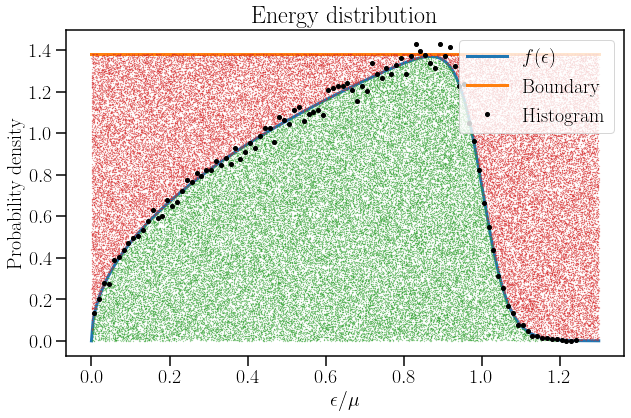

In [15]:
# Distribution
xx = np.linspace(0,pdfxmax,300)
fy = pdf(xx)
plt.plot(xx,fy,label=r'$f(\epsilon)$',lw=3)

# Boudary function
plt.plot(xx,pdfymax*np.ones_like(xx),lw=3,label='Boundary')
eff = 1/(pdfxmax*pdfymax)

#Monte Carlo generation
N_MC=int(1e5)
xi = np.random.rand(N_MC)*pdfxmax
yi = np.random.rand(N_MC)*pdfymax
accepted  = (yi<=pdf(xi))
i_in = accepted.nonzero()
i_out = (1-accepted).nonzero()
plt.plot(xi[i_in],yi[i_in],'.',alpha=0.7,ms=0.5)
plt.plot(xi[i_out],yi[i_out],'.',alpha=0.7,ms=0.5)
print('Number of data in = ',len(xi[i_in]))
print('Efficicency = ',len(xi[i_in])/N_MC)
data = xi[i_in]

nbins = 100
hist,bins= np.histogram(data,nbins,density=True)
plt.plot(bins[:-1]+(bins[-1]/nbins)/2,hist,'ok',ms=4,label='Histogram')


plt.title("Energy distribution")
plt.xlabel(r'$\epsilon/\mu$')
plt.ylabel(r"Probability density")
plt.legend()
plt.show()

## c) d) e)

In [16]:
mm = np.mean(data)
vv = np.var(data)
ss = stats.skew(data)
kk = stats.kurtosis(data)

print("mean = ", mm, "\nvariance = ", vv , "\nskewness = ", ss , "\nkurtosis = ", kk)

mean =  0.6043378440347096 
variance =  0.07099281610980746 
skewness =  -0.29194359001071 
kurtosis =  -0.9158770415761359


In [17]:
mean_th = 3/5
print('Theorical mean =', mean_th)
print('Relative error =', np.abs(1-mm/mean_th))
print('E(e)/(k_B T) =', mm*30)

Theorical mean = 0.6
Relative error = 0.0072297400578493765
E(e)/(k_B T) = 18.130135321041287


We can estimate the error on this values by doing severals MC experiments with the same number of events

In [19]:
mi = []
vi = []
si = []
ki = []
for i in range(1000):
    xi = MCgenFix(pdf,0,pdfxmax,pdfymax,len(data))
    mi.append(np.mean(xi))
    vi.append(np.var(xi))
    si.append(stats.skew(xi))
    ki.append(stats.kurtosis(xi))
    
dm = np.sqrt(np.var(mi))
dv = np.sqrt(np.var(vi))
ds = np.sqrt(np.var(si))
dk = np.sqrt(np.var(ki))


print("E_mean = ", dm, "\nE_variance = ", dv , "\nE_skewness = ", ds , "\nE_kurtosis = ", dk)

E_mean =  0.001167322532632987 
E_variance =  0.00031062888150656275 
E_skewness =  0.006329505243138483 
E_kurtosis =  0.007871614116812394


# Task 2

## a) 

Let's check that the mean of data converges to the mean of the distribution

In [20]:
mean_quad = quad(lambda x: x*pdf(x),0,15)
var_quad = quad(lambda x: (x-mean_quad[0])**2*pdf(x),0,15)
print(mean_quad)
print(var_quad)

(0.6032832446197522, 7.322473743836188e-09)
(0.07088458896484087, 4.026979499860417e-09)


In [23]:
data = MCgen(pdf,0,pdfxmax,pdfymax,int(1e5))
mean_n= np.cumsum(data)/(np.arange(len(data))+1)

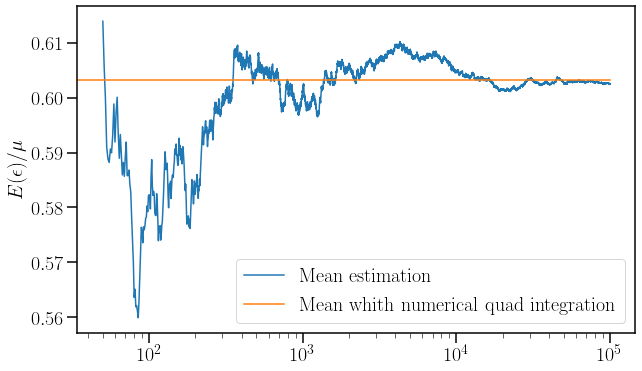

In [24]:
nmin = int(5e1)
plt.semilogx(np.arange(nmin,len(mean_n)),mean_n[nmin:],label="Mean estimation")
plt.plot([0,len(data)],mean_quad[0]*np.ones(2),label='Mean whith numerical quad integration')
plt.ylabel(r'$E(\epsilon)/\mu$')

plt.legend()
plt.show()

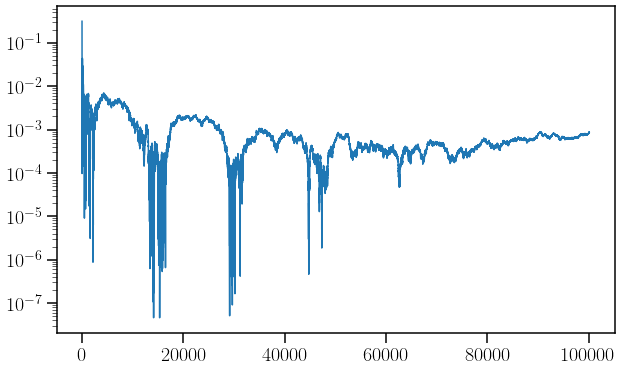

In [25]:
abserror = abs(mean_n - mean_quad[0])
plt.semilogy(abserror)

## b)

In [26]:
Nexp = int(1e5)
Nevents = int(1e3)
sum_events = np.zeros(Nexp)
for n in range(Nexp):
    events = MCgenFix(pdf,0,pdfxmax,pdfymax,Nevents)
    sum_events[n] = events.sum()

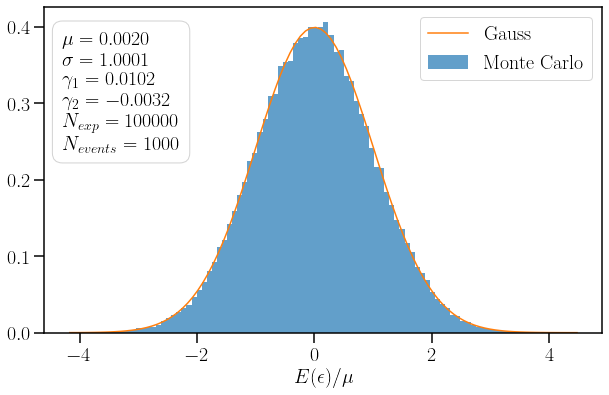

In [212]:
SS = np.array(sum_events - Nevents*mean_quad[0])/(np.sqrt(Nevents*var_quad[0]))
Smean = SS.mean()
Sstd = SS.std()
Sskew = stats.skew(SS)
Skurt = stats.kurtosis(SS,fisher=True)


plt.hist(SS,100,density=True,label='Monte Carlo',alpha=0.7)
plt.figtext(0.15,0.55, '$\mu = %0.4f$'%Smean+
            '\n$\sigma = %0.4f$'%Sstd+
            '\n$\gamma_1 = %0.4f$'%Sskew+
            '\n$\gamma_2 = %0.4f$'%Skurt+
            '\n$N_{exp} = %i$'%Nexp+
            '\n$N_{events} = %i$'%Nevents
            ,bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round', pad=0.5))

def gauss(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
xx = np.linspace(SS.min(),SS.max(),100)
plt.plot(xx,gauss(xx,Smean,Sstd), label = 'Gauss')

plt.xlabel(r'$E(\epsilon)/\mu$')
plt.legend()
plt.show()

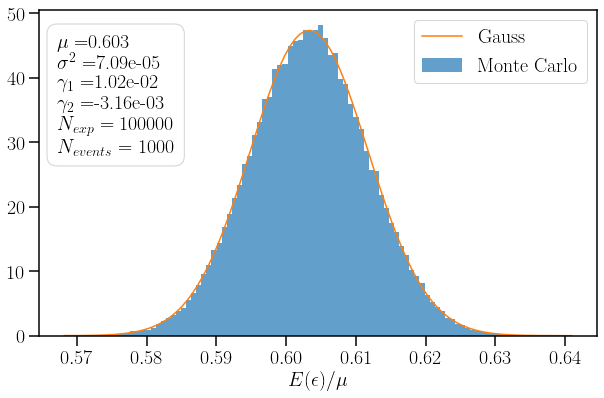

In [31]:
SS = sum_events/Nevents
Smean = SS.mean()
Svar = SS.var()
Sskew = stats.skew(SS)
Skurt = stats.kurtosis(SS,fisher=True)


plt.hist(SS,100,density=True,label='Monte Carlo',alpha = 0.7 )
plt.figtext(0.15,0.55, '$\mu = $%0.3f'%Smean+
            '\n$\sigma^2 = $%0.2e'%Svar+
            '\n$\gamma_1 = $%0.2e'%Sskew+
            '\n$\gamma_2 = $%0.2e'%Skurt+
            '\n$N_{exp} = %i$'%Nexp+
            '\n$N_{events} = %i$'%Nevents
            ,bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round', pad=0.5))

def gauss(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
xx = np.linspace(SS.min(),SS.max(),100)
plt.plot(xx,gauss(xx,Smean,np.sqrt(Svar)), label = 'Gauss')

plt.xlabel(r'$E(\epsilon)/\mu$')
plt.legend()
plt.show()

# c)

In [32]:
var_th = var_quad[0]/Nevents
var_relerror = 1-Svar/var_th
print(var_relerror)

-0.00011777041681737543


The expected varience is very close to the one obtained

# Task 3

## a)

The pdf for the number of entrance per bin follows a binomial distribution with $p$ being the probability that an event is in this bin. This probability can be approximated by $p \simeq bin_{width}\cdot pdf(bin_{center})$.
The expected value of events in a bin is then $N_{events}\cdot p$

## b)

In [232]:
def chi2(data,mu,var):
    return ((data-mu)**2/var).sum()

In [233]:
def chi2Poisson(data,mu):
    return ((data-mu)**2/mu).sum()

<ErrorbarContainer object of 3 artists>

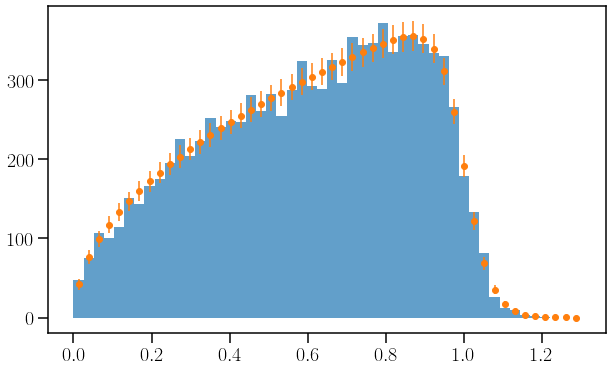

In [234]:
Nev3 = int(1e4)

nbin = 50
bins = np.linspace(0,pdfxmax,nbin+1)
binWidth = pdfxmax/nbin
binx = np.arange(nbin)*binWidth + binWidth/2

data3 = MCgenFix(pdf,0,pdfxmax,pdfymax,Nev3)

p_inbin = np.array([quad(pdf,bins[i],bins[i+1])[0] for i in range(nbin)])

num = plt.hist(data3,bins,alpha=0.7)[0]
expected_num = Nev3*p_inbin
var_num = Nev3*p_inbin*(1-p_inbin)
plt.errorbar(binx,expected_num,np.sqrt(var_num),fmt='o')

In [235]:
Nexp3 = int(1e4)
chi2s = np.zeros(Nexp3)
for n in range(Nexp3):
    data = MCgenFix(pdf,0,pdfxmax,pdfymax,Nev3)
    num = np.histogram(data,bins)[0]
    chi2s[n] = chi2(num,expected_num,var_num)

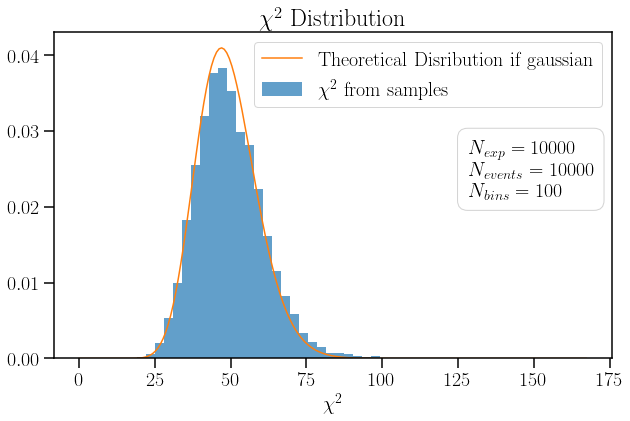

In [178]:
plt.hist(chi2s,50,density=True,alpha=0.7,label = "$\chi^2$ from samples")

xChi = np.linspace(0,chi2s.max(),200)
yChi = stats.chi2.pdf(xChi, df = nbin-1,)
plt.plot(xChi,yChi,label = "Theoretical Disribution if gaussian")

plt.figtext(0.7,0.50,
            '$N_{exp} = %i$'%Nexp3+
            '\n$N_{events} = %i$'%Nev3+
            '\n$N_{bins} = %i$'%nbins
            ,bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round', pad=0.5))


plt.title("$\chi^2$ Distribution")
plt.xlabel("$\chi^2$")
plt.legend()
plt.show()